The SIGI is built on 27 innovative variables measuring discriminatory social institutions, which are grouped into four dimensions: discrimination in the family, restricted physical integrity, restricted access to productive and financial resources, and restricted civil liberties.

The Social Institutions and Gender Index (SIGI) is a composite index measuring discriminatory social institutions. The SIGI 2023 builds on 26 variables measuring discrimination in social institutions from the Gender, Institutions and Development Database 2023 (GID-DB 2023), and which are grouped into four dimensions:

discrimination in the family,
restricted physical integrity,
restricted access to productive and financial resources, and
restricted civil liberties.
The SIGI and its dimensions range from 0 to 100, with 0 indicating no discrimination and 100 indicating absolute discrimination against women.

Covering 181 countries and territories, the SIGI 2023 seeks to provide an in-depth and global look at how laws, attitudes and practices create gaps between women and men in terms of opportunities and outcomes.



In [1]:
#import the file and view the first few rows

import pandas as pd
sidi = pd.read_csv('SIGI2023_15062023190736581.csv')
print(sidi.head(10))

   REGION       Region LOCATION    Country    VAR  \
0  REG1_3         Asia      AUS  Australia   SIGI   
1  REG1_3         Asia      AUS  Australia     DF   
2  REG1_3         Asia      AUS  Australia    RPI   
3  REG1_3         Asia      AUS  Australia  RAPFR   
4  REG1_3         Asia      AUS  Australia    RCL   
5  REG1_5  All regions      AUS  Australia   SIGI   
6  REG1_5  All regions      AUS  Australia     DF   
7  REG1_5  All regions      AUS  Australia    RPI   
8  REG1_5  All regions      AUS  Australia  RAPFR   
9  REG1_5  All regions      AUS  Australia    RCL   

                                   Variables  TIME  Time  Value  Flag Codes  \
0                                  SIGI 2023  2023  2023   15.4         NaN   
1               Discrimination in the family  2023  2023    7.9         NaN   
2              Restricted physical integrity  2023  2023   13.1         NaN   
3  Access to productive and financial assets  2023  2023   17.4         NaN   
4                 Res

In [2]:
# check for duplicates by creating an unique column

sidi['Unique_column'] = sidi['Country'] + sidi['Variables'] + sidi['Value'].astype('str')

sidi.drop_duplicates(subset = 'Unique_column', inplace = True)
print(sidi.head(10))


    REGION  Region LOCATION    Country    VAR  \
0   REG1_3    Asia      AUS  Australia   SIGI   
1   REG1_3    Asia      AUS  Australia     DF   
2   REG1_3    Asia      AUS  Australia    RPI   
3   REG1_3    Asia      AUS  Australia  RAPFR   
4   REG1_3    Asia      AUS  Australia    RCL   
10  REG1_4  Europe      AUT    Austria   SIGI   
11  REG1_4  Europe      AUT    Austria     DF   
12  REG1_4  Europe      AUT    Austria    RPI   
13  REG1_4  Europe      AUT    Austria  RAPFR   
14  REG1_4  Europe      AUT    Austria    RCL   

                                    Variables  TIME  Time  Value  Flag Codes  \
0                                   SIGI 2023  2023  2023   15.4         NaN   
1                Discrimination in the family  2023  2023    7.9         NaN   
2               Restricted physical integrity  2023  2023   13.1         NaN   
3   Access to productive and financial assets  2023  2023   17.4         NaN   
4                  Restricted civil liberties  2023  2023   

In [3]:
# reshape data to have the values in the correct form

new_sidi = sidi.pivot(index = 'Country', columns = 'Variables', values = 'Value')
print(new_sidi.head())

Variables  Access to productive and financial assets  \
Country                                                
Africa                                          39.8   
Albania                                          4.6   
Algeria                                         44.7   
Americas                                        22.4   
Angola                                          39.9   

Variables  Discrimination in the family  Restricted civil liberties  \
Country                                                               
Africa                             52.4                        33.3   
Albania                             8.6                         7.4   
Algeria                            79.9                        60.2   
Americas                           21.3                        16.2   
Angola                             22.2                         9.5   

Variables  Restricted physical integrity  SIGI 2023  
Country                                              
A

In [4]:
# checking for missing values
new_sidi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Africa to Zimbabwe
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Access to productive and financial assets  165 non-null    float64
 1   Discrimination in the family               187 non-null    float64
 2   Restricted civil liberties                 166 non-null    float64
 3   Restricted physical integrity              163 non-null    float64
 4   SIGI 2023                                  149 non-null    float64
dtypes: float64(5)
memory usage: 8.8+ KB


In [30]:
#fill in the missing values
new_sidi.fillna(new_sidi.mean(), inplace = True)
new_sidi.info()

#check for outliers
print(new_sidi.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    187 non-null    object 
 1   Access to productive and financial assets  187 non-null    float64
 2   Discrimination in the family               187 non-null    float64
 3   Restricted civil liberties                 187 non-null    float64
 4   Restricted physical integrity              187 non-null    float64
 5   SIGI 2023                                  187 non-null    float64
 6   Latitude                                   187 non-null    float64
 7   Longitude                                  187 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.8+ KB
Variables  Access to productive and financial assets  \
count                                     187.000000   
mean       

C:\Users\hime\AppData\Local\Temp\ipykernel_12884\3544788348.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_sidi.fillna(new_sidi.mean(), inplace = True)


In [10]:
# import module
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import numpy as np

In [7]:
# reset index to be able to process the country column

new_sidi = new_sidi.reset_index()
new_sidi.columns

Index(['Country', 'Access to productive and financial assets',
       'Discrimination in the family', 'Restricted civil liberties',
       'Restricted physical integrity', 'SIGI 2023'],
      dtype='object', name='Variables')

In [11]:
# declare an empty list to store latitude and longitude 

longitude = []
latitude = []
   
# function to find the coordinate of a specific country
def findGeocode(country):
       
    # try and catch is used to overcome the exception thrown by geolocator using geocodertimedout  
    try:     
        # Specify the user_agent as your
        geolocator = Nominatim(user_agent="M_M")
        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    

In [12]:
for i in new_sidi['Country']:
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # store the coordinates obtained from function
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a country not found store NaN
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [15]:
# include latitude and longitude in dataframe
new_sidi['Latitude'] = latitude
new_sidi['Longitude'] = longitude
new_sidi.head(10)

Variables,Country,Access to productive and financial assets,Discrimination in the family,Restricted civil liberties,Restricted physical integrity,SIGI 2023,Latitude,Longitude
0,Africa,39.800000,52.4,33.300000,29.400000,39.900000,11.502434,17.757812
1,Albania,4.600000,8.6,7.400000,14.900000,8.900000,41.000028,19.999962
2,Algeria,44.700000,79.9,60.200000,27.057669,28.786577,28.000027,2.999983
3,Americas,22.400000,21.3,16.200000,25.800000,20.900000,19.198291,-99.548681
4,Angola,39.900000,22.2,9.500000,29.400000,25.900000,-11.877577,17.569124
5,Antigua and Barbuda,26.997576,44.7,26.440964,27.057669,28.786577,17.223472,-61.955461
6,Argentina,34.200000,8.7,7.300000,18.100000,17.700000,-34.996496,-64.967282
7,Armenia,24.000000,26.3,16.500000,27.700000,23.700000,40.769627,44.673665
8,Asia,31.700000,50.4,36.500000,33.400000,37.000000,51.208697,89.234375
9,Australia,17.400000,7.9,22.500000,13.100000,15.400000,-24.776109,134.755000


In [23]:
#plot a world map to reflect the social institutions and gender index

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


C:\Users\hime\AppData\Local\Temp\ipykernel_12884\522177714.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


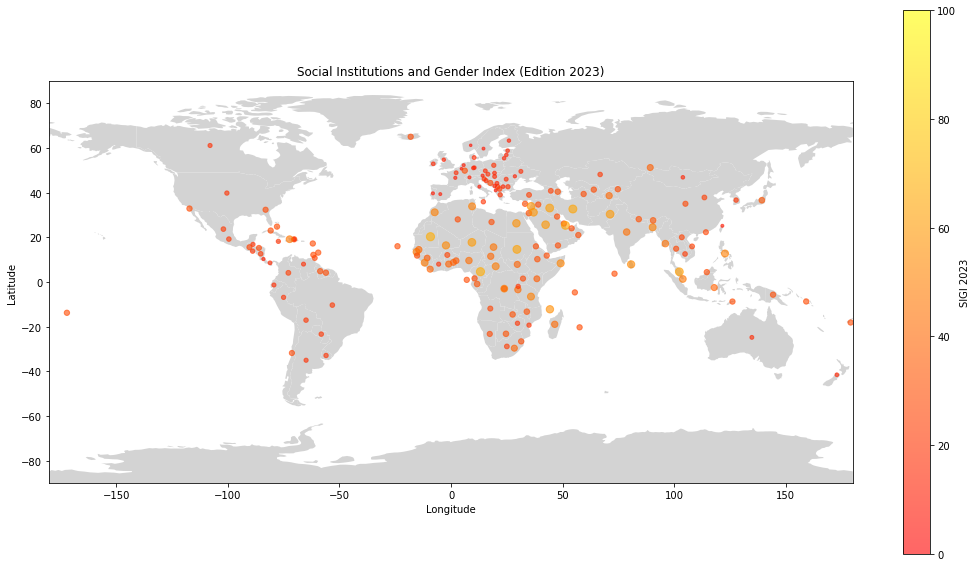

In [28]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(18, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our SIGI data with a color map
x = new_sidi['Longitude']
y = new_sidi['Latitude']
z = new_sidi['SIGI 2023']
plt.scatter(x, y, s=z, c=z, alpha=0.6, vmin=0, vmax=100,
            cmap='autumn')
plt.colorbar(label='SIGI 2023')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title('Social Institutions and Gender Index (Edition 2023)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()